In [1]:
!pip3 install inscriptis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

  Using cached https://files.pythonhosted.org/packages/0a/10/5d6a3a092f6abb1b303e006489581230990ba78f8b24c81ce3de7ead7447/inscriptis-1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/45/1e/0c169c6a5381e241ba7404532c16a21d86ab872c9bed8bdcd4c423954103/requests-2.24.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/37/d420b7fdc9a550bd29b8cfeacff3b38502d9600b09d7dfae9a69e623b891/lxml-4.5.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/9f/f0/a391d1463ebb1b233795cabfc0ef38d3db4442339de68f847026199e69d7/urllib3-1.25.10-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5e/c4/6c4fe722df5343c33226f0b4e0bb042e4dc13483228b4718baf286f86d87/certifi-2020.6.20-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.or

[nltk_data] Downloading package stopwords to /home/ayush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
cat_data = load_files(r"database_ml/")

In [4]:
X, y = cat_data.data, cat_data.target

In [5]:
# here are the labels of categories
for i in cat_data.target_names:
    print(i)

Bulletins_news_magazine
Education
Entertainment
Finance
Fitness
Food
Fortune_Telling
Forums
Gamble
Governments
ISP
Job_Portals
Online_Shopping
Porn
Religion
Science
Sex_Education
Social_Media
Sports
Travel
Url_shortner_redirector
VPN
Weapons
WebTV
Webmails
Webphones
alcohol
automobiles
chatting
dating
healthcare
piracy_movies_softwares


In [6]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [7]:
#sample of element in documents after data preprocessing
documents[0]

'vpn broadcaster backhaul domain local blacklist router uplink control smes isp last voip modem information phishing piracy intranet infringers server military ftp optic censor subscriber botnet memory mpaa dhcp firewall censorship wideband provider digital dsl fcc cybercrime neutrality broadband smtp telephony isdn network aol newsgroups mile hacker subscriber dns wide area protocol network usenet landline qos spam mbps network ddos company subnets vpns multicast unicast censorship line adsl resellers unit telecommunication computer webmail transmission regulator sender information pstn tcp subdomain megabit area ethernet measure telecom fiber telnet cable internet bandwidth spammer zufolo superhighway narrowband bittorrent telephone reseller subnet'

In [8]:
#split the data into train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 0)

In [9]:
#Using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,stop_words='english')

In [10]:
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [11]:
#Using LinearSVC 
from sklearn.svm import LinearSVC
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)


In [12]:
y_pred =model.predict(fitted_vectorizer.transform(X_test))

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [14]:
new_complaint = """booze it today"""
category_predicted=model.predict(fitted_vectorizer.transform([new_complaint]))
cat_data.target_names[int(category_predicted)]

'alcohol'

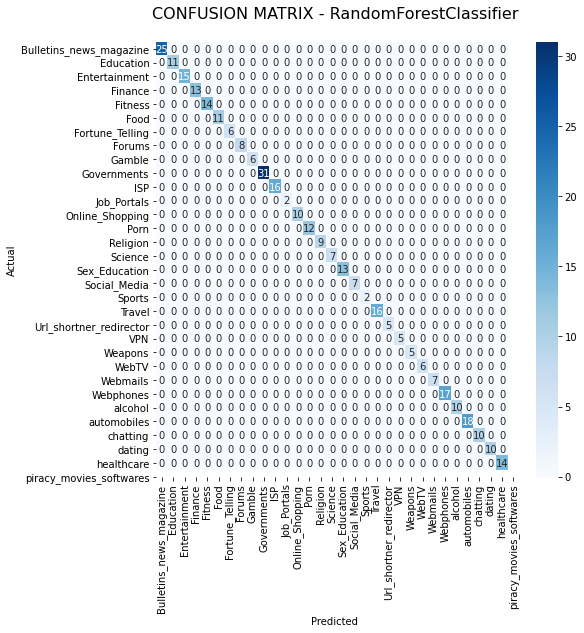

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=cat_data.target_names, 
            yticklabels=cat_data.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - RandomForestClassifier\n", size=16);

In [16]:
new_prediction = ["booze it today",
                 "As per Ganesha, you will be heading towards something big this year.",
                 "Leap forward in your Tech career with Edureka's expert-led tech certification courses. Take charge of your career & get the promotion you want by enrolling in Edureka courses!",
                "Flipkart is an Indian e-commerce company based in Bangalore, Karnataka, India. It was founded by Sachin Bansal and Binny Bansal in 2007",
                "Kejriwal requested AAP volunteers, supporters and people to donate oximeters for rural areas, saying that most of the coronavirus patients die due to lack of oxygen.",
                "The Times Now is a 24-hour English news channel in India owned and operated by The Times Group. The channel launched on 23 January 2006 in partnership with Reuters. It is a pay television throughout India. Until 2016, it was India's most popular and most viewed English news channel with Arnab Goswami as the anchor.",
                "Bharti Airtel Limited, also known as Airtel, is an Indian global telecommunications services company based in New Delhi",
                "with all kinds of sexual pleasures, presented in hard and not very clips home porn, amateur porn and professional pornstar! Jerks off on health!",
                "nstruction of issues relating to human sexuality, including emotional relations and responsibilities, human sexual anatomy, sexual activity,",
                 "transforming long, ugly links into nice, memorable and trackable short URLs. Use it to shorten links.",
                 " the company provides online travel services including flight tickets, domestic and international holiday packages, hotel reservations, rail, and bus tickets.",
                 "Buy online Clothing, Footwear & Accessories at best prices. Huge collection & premium brands available"]
for i in new_prediction:
    category_predicted=model.predict(fitted_vectorizer.transform([i]))
    print(cat_data.target_names[int(category_predicted)])

alcohol
Fortune_Telling
Education
Online_Shopping
Bulletins_news_magazine
Bulletins_news_magazine
ISP
Porn
Sex_Education
Url_shortner_redirector
Travel
Online_Shopping


In [19]:
import urllib.request
from inscriptis import get_text

url = input("Enter URL: ")
html = urllib.request.urlopen(url).read().decode('utf-8')

text = get_text(html)

extracted_data=text.split()
refined_data=[]
SYMBOLS = '{}()[].,:;+-*/&|<>=~0123456789' 
for i in extracted_data:
	if i not in SYMBOLS:
		refined_data.append(i)

# print("\n","$"*50,"HEYAAA we got arround: ",len(refined_data)," of keywords! Here are they: ","$"*50,"\n")
predict_this=" ".join(refined_data)
category_predicted=model.predict(fitted_vectorizer.transform([predict_this]))
print("-"*100)
print("Predicted Category for giver URL is: ",cat_data.target_names[int(category_predicted)])

Enter URL:  http://mypornvideos.pro/


----------------------------------------------------------------------------------------------------
Predicted Category for giver URL is:  Porn
